In [ ]:
# Importing the necessary packages
import pandas as pd
import numpy
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam
from keras.layers import Dropout

In [ ]:
# Importing the dataset
df = pd.read_csv('forestfires.csv')
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small


In [ ]:
#EDA
df1=df.drop(["monthfeb","monthjan","monthmar","monthapr","monthmay","monthjun","monthjul","monthaug","monthsep","monthoct","monthnov","monthdec"],axis=1)
df2=df1.drop(["daysat","daysun","daythu","daytue","daywed","daymon","dayfri"],axis=1)

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df2.iloc[:,0] = labelencoder.fit_transform(df2.iloc[:,0])
df2.iloc[:,1] = labelencoder.fit_transform(df2.iloc[:,1])
df2.iloc[:,-1]= labelencoder.fit_transform(df2.iloc[:,-1])

In [ ]:
df2.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,1


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    int64  
 1   day            517 non-null    int64  
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  size_category  517 non-null    int64  
dtypes: float64(8), int64(4)
memory usage: 48.6 KB


In [ ]:
X = df2.drop('size_category',axis=1)
X

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...
512,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [ ]:
Y= df2['size_category']

In [ ]:
#standardization
from sklearn.preprocessing import StandardScaler
stscaler = StandardScaler().fit(X)
X_std = stscaler.transform(X)
X_std = pd.DataFrame(X_std)
X_std.columns=X.columns
print(X_std.head())

      month       day      FFMC  ...      wind      rain     area
0  0.284222 -1.423121 -0.805959  ...  1.498614 -0.073268 -0.20202
1  0.970871  1.176715 -0.008102  ... -1.741756 -0.073268 -0.20202
2  0.970871 -0.383187 -0.008102  ... -1.518282 -0.073268 -0.20202
3  0.284222 -1.423121  0.191362  ... -0.009834  0.603155 -0.20202
4  0.284222  0.136781 -0.243833  ... -1.238940 -0.073268 -0.20202

[5 rows x 11 columns]


In [ ]:
# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_std, Y, test_size = 0.2, random_state = 0)

In [ ]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 10,kernel_initializer='he_uniform',activation='relu',input_dim = 11))

# Adding the second hidden layer
classifier.add(Dense(units = 10, kernel_initializer = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# Fitting the ANN to the Training set
from keras.callbacks import History 
history = History()
model_history=classifier.fit(X_train,y_train,validation_split=0.33, batch_size = 10,epochs = 50,callbacks = [history])

Epoch 1/50
28/28 [==============================] - 1s 19ms/step - loss: 1.1517 - accuracy: 0.2766 - val_loss: 0.9926 - val_accuracy: 0.2847
Epoch 2/50
28/28 [==============================] - 0s 3ms/step - loss: 0.9569 - accuracy: 0.3343 - val_loss: 0.8652 - val_accuracy: 0.3212
Epoch 3/50
28/28 [==============================] - 0s 3ms/step - loss: 0.8565 - accuracy: 0.4389 - val_loss: 0.7761 - val_accuracy: 0.3869
Epoch 4/50
28/28 [==============================] - 0s 3ms/step - loss: 0.7355 - accuracy: 0.4729 - val_loss: 0.7249 - val_accuracy: 0.4818
Epoch 5/50
28/28 [==============================] - 0s 3ms/step - loss: 0.6801 - accuracy: 0.5550 - val_loss: 0.6862 - val_accuracy: 0.5547
Epoch 6/50
28/28 [==============================] - 0s 3ms/step - loss: 0.6496 - accuracy: 0.6547 - val_loss: 0.6613 - val_accuracy: 0.6715
Epoch 7/50
28/28 [==============================] - 0s 3ms/step - loss: 0.6254 - accuracy: 0.7071 - val_loss: 0.6437 - val_accuracy: 0.7080
Epoch 8/50
28/28 [=

In [ ]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

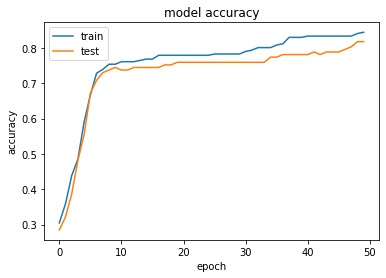

In [ ]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

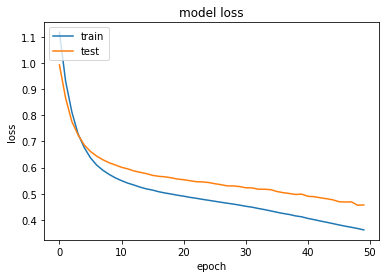

In [ ]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[17, 13],
       [ 1, 73]])

In [ ]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.8653846153846154

### Alternative Method:

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv(forestfires.csv")

In [ ]:
#EDA
df.drop(["month","day"],axis=1,inplace = True)
df["size_category"].value_counts()
df.isnull().sum()
df.describe()

In [ ]:
#small = 0, large = 1
df.loc[df["size_category"]=='small','size_category']=0
df.loc[df["size_category"]=='large','size_category']=1
df["size_category"].value_counts()


In [ ]:
#Normalization
def norm_func(i):
     x = (i-i.min())/(i.max()-i.min())
     return (x)

In [ ]:
#separating predictors and target variables
predictors = df.iloc[:,0:28]
target = df.iloc[:,28]

In [ ]:
#normalizing the predictors
predictors1 = norm_func(predictors)
data = pd.concat([predictors1,target],axis=1)


In [ ]:
#splitting the data into train and test datasetss
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(predictors1,target, test_size=0.3,stratify = target)


In [ ]:

from keras.models import Sequential
from keras.layers import Dense, Activation,Layer,Lambda
def prep_model(hidden_dim):
    model = Sequential()
    for i in range(1,len(hidden_dim)-1):
        if (i==1):
            model.add(Dense(hidden_dim[i],input_dim=hidden_dim[0],activation="relu"))
        else:
            model.add(Dense(hidden_dim[i],activation="relu"))
    model.add(Dense(hidden_dim[-1],kernel_initializer="normal",activation="sigmoid"))
    model.compile(loss="binary_crossentropy",optimizer = "rmsprop",metrics = ["accuracy"])
    return model  

In [ ]:
y_train = pd.DataFrame(y_train)

In [ ]:
#building the model
first_model = prep_model([28,50,40,20,1])
first_model.fit(np.array(x_train),np.array(y_train),epochs=500)
pred_train = first_model.predict(np.array(x_train))

In [ ]:
#Converting the predicted values to series 
pred_train = pd.Series([i[0] for i in pred_train])

In [ ]:
#predictions of class for train data
size = ["small","large"]
pred_train_class = pd.Series(["small"]*361)
pred_train_class[[i>0.5 for i in pred_train]]= "large"


In [ ]:
train = pd.concat([x_train,y_train],axis=1)
train["size_category"].value_counts()

In [ ]:
#metrics of success For training data
from sklearn.metrics import confusion_matrix
train["original_class"] = "small"
train.loc[train["size_category"]==1,"original_class"] = "large"
train.original_class.value_counts()
confusion_matrix(pred_train_class,train["original_class"])
np.mean(pred_train_class==pd.Series(train["original_class"]).reset_index(drop=True)) 
pd.crosstab(pred_train_class,pd.Series(train["original_class"]).reset_index(drop=True))


In [ ]:
#metrics of success For test data
pred_test = first_model.predict(np.array(x_test))
pred_test = pd.Series([i[0] for i in pred_test])
pred_test_class = pd.Series(["small"]*156)
pred_test_class[[i>0.5 for i in pred_test]] = "large"
test =pd.concat([x_test,y_test],axis=1)
test["original_class"]="small"
test.loc[test["size_category"]==1,"original_class"] = "large"

In [ ]:
test["original_class"].value_counts()
np.mean(pred_test_class==pd.Series(test["original_class"]).reset_index(drop=True)) 
confusion_matrix(pred_test_class,test["original_class"])
pd.crosstab(pred_test_class,pd.Series(test["original_class"]).reset_index(drop=True))